### In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.The description of the dataset is as follows:

**Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [4]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df = pd.concat([train_set, test_set], axis=0)
dff=df

In [9]:
print(df.apply(lambda x: sum(x.isnull()), axis = 0))
print(' ')

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64
 


In [10]:
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

In [11]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [12]:
df['sex'] = np.where(df['sex'] == 'female', 0, 1)

In [13]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df.replace(' ?', np.nan, inplace=True)

In [15]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

In [16]:
df.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,workclass: Private,workclass: Self-emp-inc,workclass: Self-emp-not-inc,workclass: State-gov,workclass: Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,...,United-States,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,...,United-States,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,...,United-States,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,...,United-States,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,...,Cuba,0,0,0,0,1,0,0,0,0


In [17]:
df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

In [18]:
df.head()

,age,fnlwgt,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,...,workclass: Self-emp-not-inc,workclass: State-gov,workclass: Without-pay,marital_status: Divorced,marital_status: Married-AF-spouse,marital_status: Married-civ-spouse,marital_status: Married-spouse-absent,marital_status: Never-married,marital_status: Separated,marital_status: Widowed
0,39,77516,Bachelors,13,Adm-clerical,Not-in-family,White,1,2174,0,...,0,1,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,Exec-managerial,Husband,White,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,38,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,11th,7,Handlers-cleaners,Husband,Black,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Prof-specialty,Wife,Black,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

In [20]:
df.head()

,age,fnlwgt,education,education_num,relationship,race,sex,capital_gain,capital_loss,hours_per_week,...,occupation: Farming-fishing,occupation: Handlers-cleaners,occupation: Machine-op-inspct,occupation: Other-service,occupation: Priv-house-serv,occupation: Prof-specialty,occupation: Protective-serv,occupation: Sales,occupation: Tech-support,occupation: Transport-moving
0,39,77516,Bachelors,13,Not-in-family,White,1,2174,0,40,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,Bachelors,13,Husband,White,1,0,0,13,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,HS-grad,9,Not-in-family,White,1,0,0,40,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,11th,7,Husband,Black,1,0,0,40,...,0,1,0,0,0,0,0,0,0,0
4,28,338409,Bachelors,13,Wife,Black,1,0,0,40,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

In [22]:
df.head()

,age,fnlwgt,education,education_num,race,sex,capital_gain,capital_loss,hours_per_week,native_country,...,occupation: Protective-serv,occupation: Sales,occupation: Tech-support,occupation: Transport-moving,relationship: Husband,relationship: Not-in-family,relationship: Other-relative,relationship: Own-child,relationship: Unmarried,relationship: Wife
0,39,77516,Bachelors,13,White,1,2174,0,40,United-States,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,Bachelors,13,White,1,0,0,13,United-States,...,0,0,0,0,1,0,0,0,0,0
2,38,215646,HS-grad,9,White,1,0,0,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Black,1,0,0,40,United-States,...,0,0,0,0,1,0,0,0,0,0
4,28,338409,Bachelors,13,Black,1,0,0,40,Cuba,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)
df.head()

,age,fnlwgt,education,education_num,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,...,relationship: Not-in-family,relationship: Other-relative,relationship: Own-child,relationship: Unmarried,relationship: Wife,race: Amer-Indian-Eskimo,race: Asian-Pac-Islander,race: Black,race: Other,race: White
0,39,77516,Bachelors,13,1,2174,0,40,United-States,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,Bachelors,13,1,0,0,13,United-States,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,HS-grad,9,1,0,0,40,United-States,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,11th,7,1,0,0,40,United-States,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,1,0,0,40,Cuba,0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

In [25]:
df.head()

,age,fnlwgt,education,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,Bachelors,13,1,2174,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,1,0,0,13,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,11th,7,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.drop('education', axis=1,inplace=True)
df.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dff.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [28]:
dff.replace(' ?', np.nan, inplace=True)
dff.fillna(' 0', inplace=True)

C:\Users\mahe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mahe\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

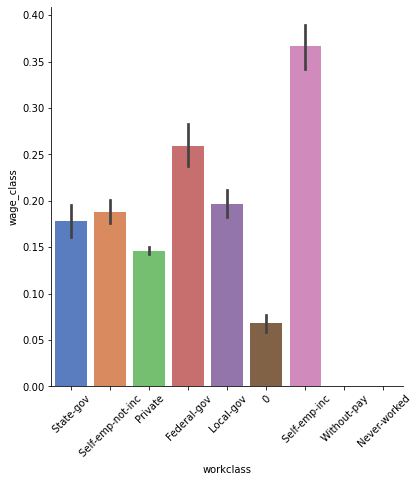

In [29]:
sns.factorplot(x="workclass", y="wage_class", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['workclass'].value_counts()

In [30]:
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn import metrics
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
prediction = XGBClassifier.predict(X_test)

print('XGBoost results:')
print(metrics.accuracy_score(y_test, prediction))

XGBoost results:
0.8635479578257754
